# Tutorial

Let's consider a toy problem. Here we consider a signal $\mathsf{x^\star \in \mathbb{R}^n}$ where $\mathsf{x^\star = M s}$ with $\mathsf{M \in \mathbb{R}^{n\times r}}$ and $\mathsf{s\in\mathbb{R}^r}$. The vector $\mathsf{s}$ is generated as the element-wise product of a Gaussian random vector and a Bernoulli vector ($\mathsf{p}$ the probability that each entry is nonzero), each vector with i.i.d. entries.


Access is given to linear measurements $ \mathsf{d = A x^\star}, $ where $\mathsf{A\in\mathbb{R}^{m\times n}}$ is a matrix with normalized columns (up to numerical tolerance). The task at hand is to

$$\mathsf{ Find\  x^\star\ given\ d\ and\ A}.$$

Using the fact that $\mathsf{p\cdot r\ll n}$, we know $\mathsf{x^\star}$ admits a sparse representation. Thus, we estimate

$$ \mathsf{x^\star \approx argmin_{x} \ \|K x\|_1 \ \ \mbox{s.t.}\ \ Ax=d.} $$

In this case, the implicit L2O model takes as input $\mathsf{d}$ and outputs an inference via

$$ \mathsf{{N_{\theta}}(d) = argmin_{x} \ \|K x\|_1 \ \ \mbox{s.t.}\ \ Ax=d}.$$

<br>

Throughout, we take $\mathsf{m=100}$, $\mathsf{n=250}$, $\mathsf{r=50}$, and $\mathsf{p=0.1}$.


First, we import various utilities and mount Google drive (where this notebook was executed).

In [1]:
import os
import sys
from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/xai-l2o/src/')
save_dir = './drive/MyDrive/xai-l2o/'

# from certificate import CertificateModel, CertificateEnsemble
from utils import solve_least_squares, create_dict_loaders
from utils import plot_dict_signal, print_model_params
from models import ImpDictModel
import scipy.io
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.data.dataset import random_split

torch.manual_seed(31415)

loader_train, loader_test, A = create_dict_loaders()

max_epoch = 75
device    = 'cuda:0'
model     = ImpDictModel(A)
model     = model.to(device=device)
criterion = nn.MSELoss()
file_name = save_dir + 'weights/dictionary_model_weights.pth'

loss_best       = 1.0e10
MSE_ave         = 0.0
learning_rate   = 4.0e-5
max_depth_train = 400
max_depth_test  = 2000
optimizer       = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1.0e-5)
training_msg    = '[{:5d}] train loss = {:2.3e} | depth = {:3.0f} | lr = {:2.3e}'
training_msg   += ' | K 2-norm = {:2.3e}'

model.to(device)

print_model_params(model)

load_weights = False
if load_weights:
    state = torch.load(file_name, map_location=torch.device(device))
    model.load_state_dict(state['model_state_dict'])
    print('Loaded model from file.')
    epochs_adm = 0

Mounted at /content/drive
+-------------------+--------------+
| Network Component | # Parameters |
+-------------------+--------------+
|         K         |    62500     |
|       TOTAL       |    62500     |
+-------------------+--------------+


## Model Training
With the model loaded, we next train it to predict $\mathsf{x^\star}$ from $\mathsf{d}$. We use the Adam optimizer and print samples from test data every few epochs to give intuition for how well the parameters are tuned.

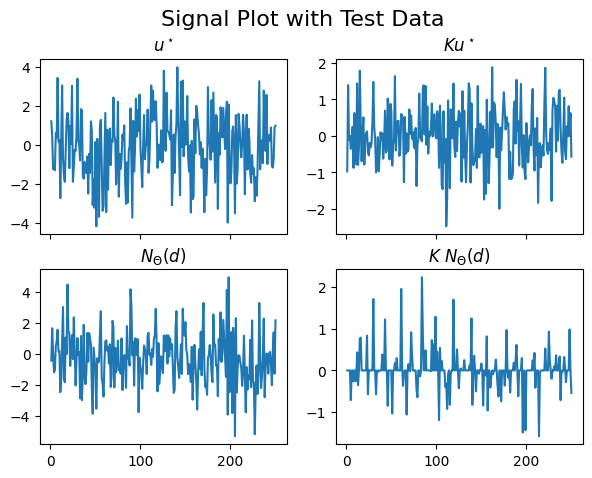

Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[    0] train loss = 4.517e+00 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[    1] train loss = 3.454e+00 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[    2] train loss = 2.508e+00 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[    3] train loss = 2.057e+00 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[    4] train loss = 1.678e+00 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
[    5] train loss = 1.681e+00 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_mode

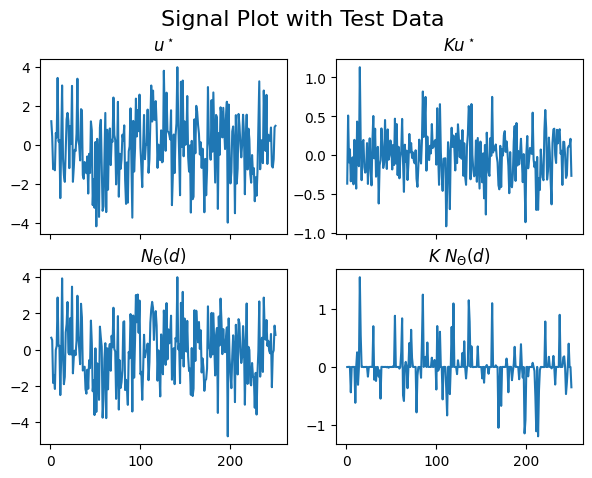

Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[   10] train loss = 7.052e-01 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[   11] train loss = 5.494e-01 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[   12] train loss = 5.340e-01 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[   13] train loss = 4.789e-01 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[   14] train loss = 4.106e-01 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[   15] train loss = 3.093e-01 | depth = 400 | lr = 4.000e-05 | K 2-nor

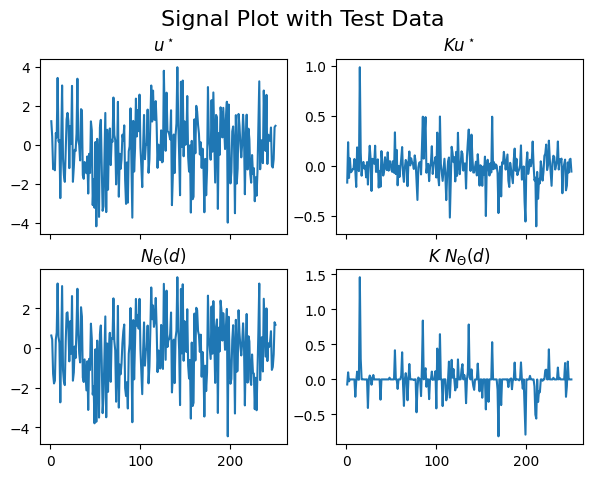

Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[   20] train loss = 1.486e-01 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[   21] train loss = 1.426e-01 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[   22] train loss = 1.246e-01 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[   23] train loss = 9.714e-02 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[   24] train loss = 8.895e-02 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[   25] train loss = 8.003e-02 | depth = 400 | lr = 4.000e-05 | K 2-nor

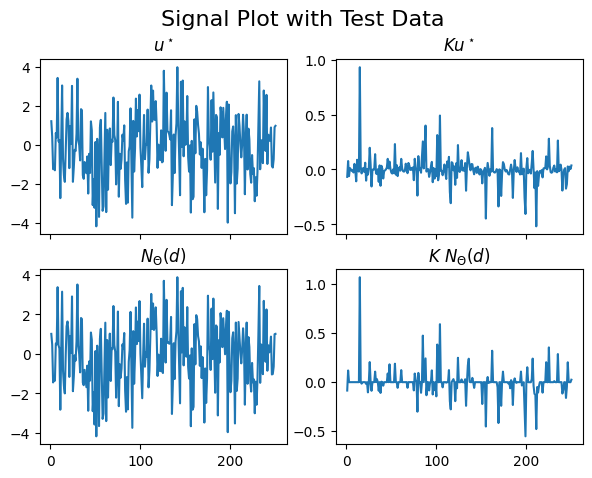

Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[   30] train loss = 2.939e-02 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[   31] train loss = 2.802e-02 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[   32] train loss = 2.250e-02 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[   33] train loss = 2.195e-02 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[   34] train loss = 1.735e-02 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
[   35] train loss = 1.775e-02 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_mode

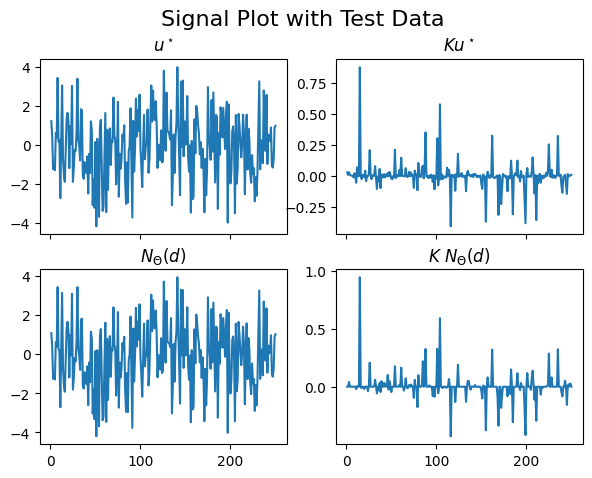

Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[   40] train loss = 8.157e-03 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[   41] train loss = 7.205e-03 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
[   42] train loss = 7.407e-03 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[   43] train loss = 5.772e-03 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[   44] train loss = 4.510e-03 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
[   45] train loss = 4.862e-03 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[   46] train loss = 4.249e-03 | depth = 400 | lr = 4.000e-05 | K 2-no

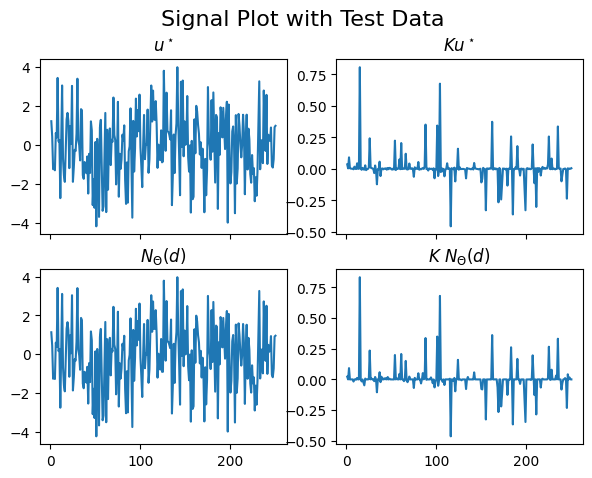

Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[   50] train loss = 3.396e-03 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
[   51] train loss = 3.416e-03 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[   52] train loss = 3.149e-03 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
[   53] train loss = 3.605e-03 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
[   54] train loss = 3.377e-03 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
[   55] train loss = 3.221e-03 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
[   56] train loss = 3.386e-03 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
[   57] train loss = 3.252e-03 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[   58] train loss = 2.867e-03 | depth = 400 | lr = 4.000e-05 | K 2-

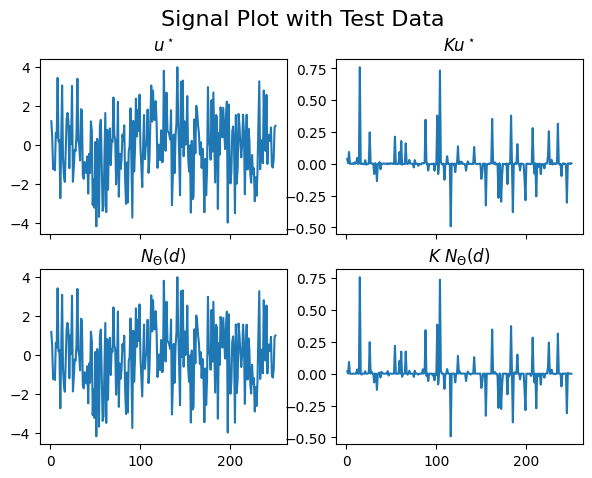

[   60] train loss = 2.959e-03 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
[   61] train loss = 3.224e-03 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
[   62] train loss = 3.140e-03 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
[   63] train loss = 3.102e-03 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
[   64] train loss = 3.085e-03 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[   65] train loss = 2.834e-03 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_model_weights.pth
[   66] train loss = 2.826e-03 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
[   67] train loss = 2.889e-03 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
[   68] train loss = 2.925e-03 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
Model weights saved to ./drive/MyDrive/xai-l2o/weights/dictionary_m

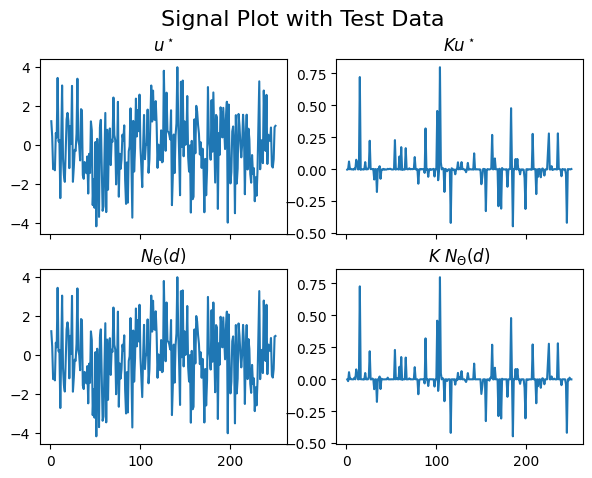

[   70] train loss = 2.849e-03 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
[   71] train loss = 2.727e-03 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
[   72] train loss = 3.067e-03 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
[   73] train loss = 2.760e-03 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00
[   74] train loss = 2.825e-03 | depth = 400 | lr = 4.000e-05 | K 2-norm = 1.000e+00


In [2]:
for epoch in range(max_epoch):
    model.train()
    for x_true, d_batch in loader_train:
        optimizer.zero_grad()
        x_pred, depth = model(d_batch, max_depth=max_depth_train,
                              normalize_K=True, return_depth=True)
        loss = criterion(x_pred, x_true.to(device).float())
        loss.backward()
        optimizer.step()
        loss_curr = loss.detach().item()

    if epoch % 10 == 0:
        plot_dict_signal(model, loader_test, inference_depth=max_depth_test)

    if loss_curr < loss_best:
        loss_best = loss_curr
        state = {
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict()
        }
        torch.save(state, file_name)
        print('Model weights saved to ' + file_name)

    K_norm = torch.linalg.matrix_norm(model.K.detach(), ord=2)
    print(training_msg.format(epoch, loss_curr, depth,
                              optimizer.param_groups[0]['lr'], K_norm))

## Property Values

Below we define measurements for the two properties of signals of interest.

*   $\ell_1$ is used as a surrogate for sparsity, i.e., $\|x\|_1$
*   Fidelity is a "pass" if tolerance $\|Ax-d\|\leq\epsilon\cdot \|A^\top d\|$ is satisfied.

In [3]:
def get_sparsity(x, d=None) -> float:
    """ Quantify sparsity of signal via number of nonzeros

        Signals are expected to be sparse asymptotically, i.e. if
        the forward prop runs for infinitely many steps (due to the
        linear coupling between variables 'Kx' and 'p' in the model).
        Sparsity is approximately quantified by the L1 norm.

        Note: We use the transpose of Kx throughout due to shape of x.
    """
    Kx = model.K.detach().cpu().mm(x)
    return float(torch.norm(Kx, dim=0, p=1))


def get_fidelity(x, d, tol_norm=1.0e-10) -> float:
    """ Compute norm of relative error for linear measurements
    """
    fidelity = A.cpu().mm(x) - d.cpu()
    norm_fidelity = torch.norm(fidelity, dim=0)
    norm_data = torch.norm(d.cpu(), dim=0)
    norm_data += tol_norm * norm_fidelity
    norm_fidelity_rel = norm_fidelity / norm_data
    return float(norm_fidelity_rel)

## Compute Certificate Thresholds

Here's how certificates work.

1.   Compute property value for each sample in training data (using trained L2O model).
2.   Decide probability/threshold for pass/warning/fail.
3.   Find property value for thresholds of interest.
4.   Pass flag function with these threshold values into L2O model.

For simplicity, here we only use "pass" and "fail" flags.



In [4]:
# create a list for everything
val_sparse = []

print('creating list')
for x_true, d_batch in loader_train:
    optimizer.zero_grad()
    x_pred = model(d_batch, max_depth=max_depth_test).cpu()
    n      = x_pred.shape[1]

    for i in range(x_pred.shape[0]):
        l1 = get_sparsity(torch.reshape(x_pred[i, :], (n, 1)))
        val_sparse.append(l1)
print('list created')
val_sparse.sort()

# fail threshold = 5%
index = int((1.0 - 0.05) * len(val_sparse))
print("index = ", index)
print("thresh = ", val_sparse[index])
thresh = val_sparse[index]

creating list
list created
index =  9500
thresh =  28.128530502319336


## Make a Histogram for Sparsity of Inferences on Training Data

This is used to identify the threshold for where to flag inferences.

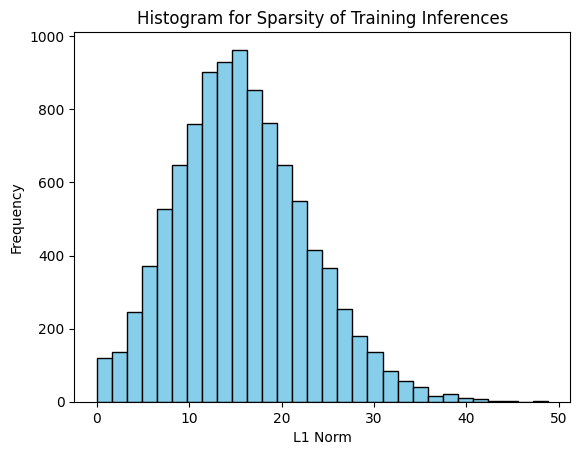

In [5]:
import matplotlib.pyplot as plt
plt.hist(val_sparse, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('L1 Norm')
plt.ylabel('Frequency')
plt.title('Histogram for Sparsity of Training Inferences')
plt.show()

## Summary Graphics

Below we generate signalx $\mathsf{x}$ a few different ways and output the corresponding certificates.

+---------------+----------+------+------------------------+
|     Method    | Property | Flag |         Value          |
+---------------+----------+------+------------------------+
|      true     | sparsity | Pass |   10.601624488830566   |
|      true     | fidelity | Pass | 2.9143777169338136e-07 |
|     wrong     | sparsity | Pass |   16.99894905090332    |
|     wrong     | fidelity | Fail |   2.330275297164917    |
| least_squares | sparsity | Fail |   96.85482025146484    |
| least_squares | fidelity | Pass | 5.277252626001427e-07  |
|      pred     | sparsity | Pass |   10.332365989685059   |
|      pred     | fidelity | Pass | 3.8547517760889605e-05 |
+---------------+----------+------+------------------------+


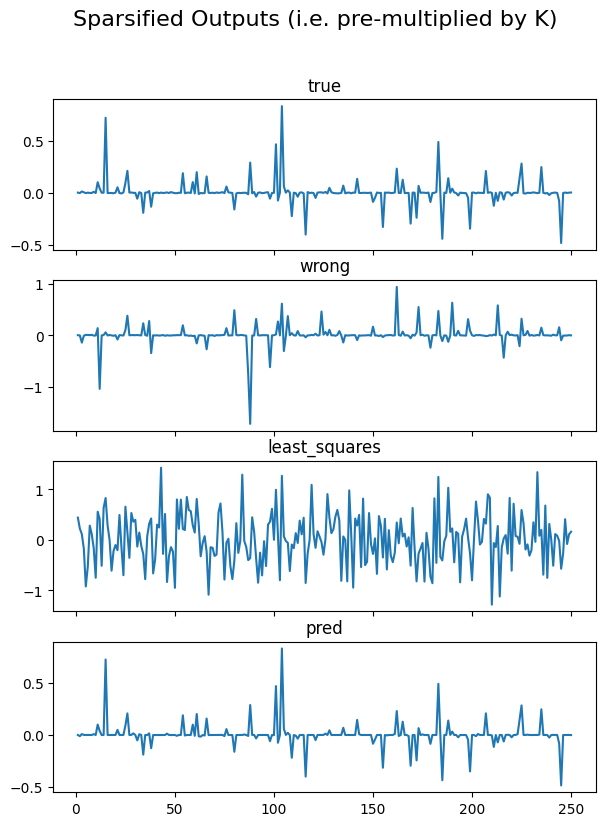

In [6]:
import matplotlib.pyplot as plt
from prettytable import PrettyTable

m = A.shape[0]
n = A.shape[1]

x_true, d_true = list(loader_test)[0]
n              = x_true.shape[1]
x_wrong, _     = list(loader_test)[0]
x_true         = torch.reshape(x_true[0,:].cpu(), (n, 1))
x_wrong        = torch.reshape(x_wrong[1,:], (n, 1))
x_pred         = model(d_true.to(device), max_depth=max_depth_test).cpu()[0, :]
x_pred         = torch.reshape(x_pred, (n, 1))
x_ls           = solve_least_squares(A.cpu(), d_true.cpu())
x_ls           = torch.reshape(x_ls[0, :], (n,1))
d_true         = torch.reshape(d_true[0,:],  (m, 1))

table      = PrettyTable(["Method", "Property", "Flag", "Value"])
properties = [{'name': 'sparsity', 'thresh': thresh, 'func': get_sparsity},
              {'name': 'fidelity', 'thresh': 0.010, 'func': get_fidelity}]
methods    = [{'name': 'true', 'vec': x_true},
              {'name': 'wrong', 'vec': x_wrong},
              {'name': 'least_squares', 'vec': x_ls},
              {'name': 'pred', 'vec': x_pred}]
fig, axes  = plt.subplots(4, 1, sharex="col", figsize=(7, 9))
t          = np.linspace(1, n, n, endpoint=True)

for idx, method in enumerate(methods):
    for prop in properties:
        x         = method['vec'].cpu()
        prop_val  = prop['func'](x, d=d_true)
        prop_pass = "Pass" if (prop_val < prop['thresh']) else "Fail"
        table.add_row([method['name'], prop['name'],  prop_pass, prop_val])

    Kx = model.K.detach().cpu() @ x
    axes[idx].plot(t, Kx.detach().numpy())
    axes[idx].set_title(method['name'])

print(table)

fig.suptitle("Sparsified Outputs (i.e. pre-multiplied by K)", fontsize=16)
plt.show()

## Save Sample Images to File

In [7]:
import os

if not os.path.exists("./files/"):
    os.makedirs("./files/")


method_name = ['inf', 'true', 'wrong_sparse', 'least_squares']
method_vec  = [x_pred, x_true, x_wrong, x_ls]

for i, name in enumerate(method_name):
    filename = './files/dict_' + name + '.csv'
    with open(filename, 'w') as f:
        x  = method_vec[i].detach()
        Kx = model.K.detach().cpu() @ x
        for i in range(len(x)):
            f.write(str(float(Kx[i].numpy())) + '\n')

with open('./files/true.csv', 'w') as f:
    for i in range(len(x_true)):
        f.write(str(float(x_true[i].numpy())) + '\n')

import shutil
shutil.make_archive('toy-example-files', 'zip', './files/')

from google.colab import files
files.download('toy-example-files.zip')

<ipython-input-7-8d01e7a91935>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f.write(str(float(Kx[i].numpy())) + '\n')
<ipython-input-7-8d01e7a91935>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f.write(str(float(x_true[i].numpy())) + '\n')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>